In [ ]:

#importing required libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# For better visuals
sns.set(style='whitegrid')


LOADING OF DATASET

In [ ]:

df = pd.read_csv('Tweets.csv')
df = df[['airline_sentiment', 'text', 'airline']].dropna()
df['airline_sentiment'] = df['airline_sentiment'].str.capitalize()
df

,airline_sentiment,text,airline
0,Neutral,@VirginAmerica What @dhepburn said.,Virgin America
1,Positive,@VirginAmerica plus you've added commercials t...,Virgin America
2,Neutral,@VirginAmerica I didn't today... Must mean I n...,Virgin America
3,Negative,@VirginAmerica it's really aggressive to blast...,Virgin America
4,Negative,@VirginAmerica and it's a really big bad thing...,Virgin America
...,...,...,...
14635,Positive,@AmericanAir thank you we got on a different f...,American
14636,Negative,@AmericanAir leaving over 20 minutes Late Flig...,American
14637,Neutral,@AmericanAir Please bring American Airlines to...,American
14638,Negative,"@AmericanAir you have my money, you change my ...",American


ADDING POLARITY SCORE AND DEFINE THE SENTIMENT <br>

    NEGATIVE --> IF VALUE LESS THAN 0 ,<br>
    NEUTRAL --> IF VALUE EQUALS TO ZERO, <br>
    POSITIVE --> IF VALUE GREATER THAN ZERO<br>



In [ ]:
# Add polarity scores(-1 to +1)
df['polarity'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
def count_polarity(x):
    if x<0:
        return 'Negative'
    elif x>0:
        return 'Positive'
    else:
        return 'Neutral'
df['predicted_sentiment']=df['polarity'].apply(count_polarity)    
df['predicted_sentiment']

0         Neutral
1         Neutral
2        Negative
3        Positive
4        Negative
           ...   
14635     Neutral
14636    Negative
14637     Neutral
14638    Negative
14639    Positive
Name: predicted_sentiment, Length: 14640, dtype: object

VISUALIZATIONS<BR>
1-SENTIMENT DISTRIBUTION<BR>
2-SENTIMENT DISTRIBUTION(BY AIRLINE)<BR>
3-DISTRIBUTION OF POLARITY SCORES<BR>
4-PROPORTION OF SENTIMENT<BR>
5-AVERAGE SENTIMENT POLARITY BY AIRLINE<BR>


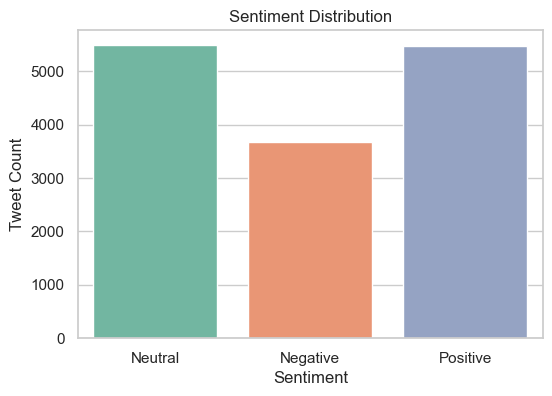

In [29]:
#Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='predicted_sentiment', hue='predicted_sentiment', data=df, palette='Set2', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


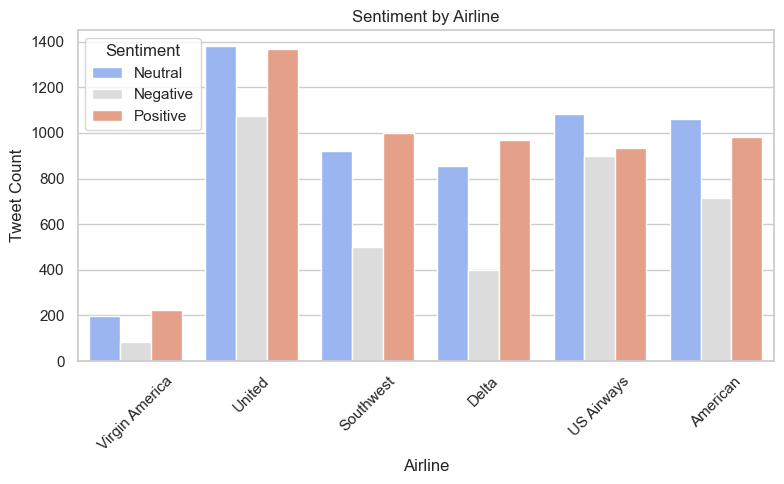

In [52]:
#sentiment by airline
plt.figure(figsize=(8,5))
sns.countplot(x='airline', hue='predicted_sentiment', data=df, palette='coolwarm')
plt.title("Sentiment by Airline")
plt.xlabel("Airline")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


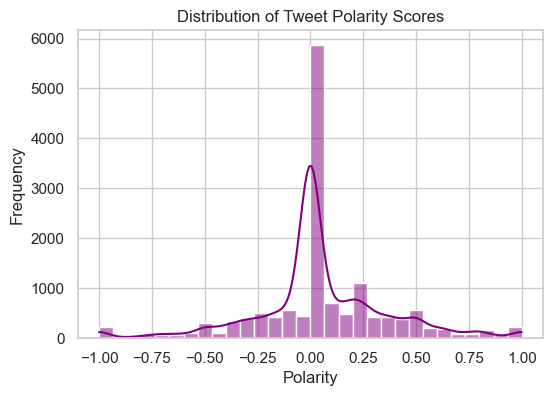

In [ ]:
#polarity score distribution
plt.figure(figsize=(6,4))
sns.histplot(df['polarity'], kde=True, bins=30, color='purple')
plt.title("Distribution of Tweet Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()


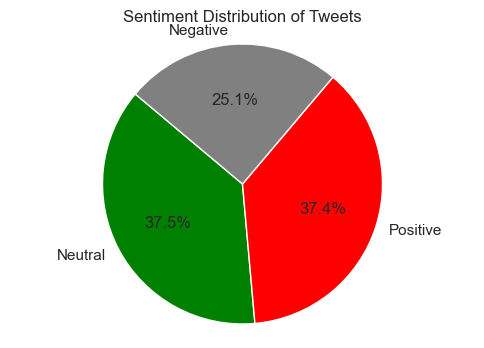

In [53]:
#proportion of sentiment
import matplotlib.pyplot as plt

# Count of each sentiment
sentiment_counts = df['predicted_sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['green', 'red', 'gray']

# Pie chart
plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution of Tweets')
plt.axis('equal')  # Ensures pie is a circle
plt.show()


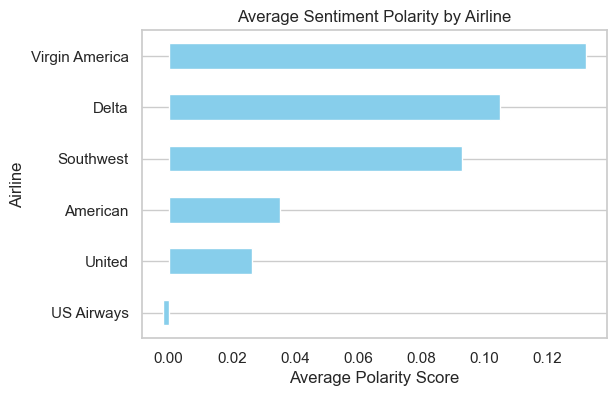

In [ ]:
#average polarity by airline
airline_sentiment_score = df.groupby('airline')['polarity'].mean().sort_values()

plt.figure(figsize=(6,4))
airline_sentiment_score.plot(kind='barh', color='skyblue')
plt.title("Average Sentiment Polarity by Airline")
plt.xlabel("Average Polarity Score")
plt.ylabel("Airline")
plt.grid(axis='x')
plt.show()
